📊 Data Analysis Toolkit Ready!
🚀 STARTING COMPREHENSIVE DATA ANALYSIS

🔄 LOADING DATA
------------------------------
Option 1: Upload a CSV file


❌ No file uploaded. Using sample data instead.

Option 2: Creating sample dataset for demonstration
✅ Sample dataset created successfully!

📈 BASIC DATA ANALYSIS
----------------------------------------
📋 Dataset Overview:
Shape: (1000, 8)
Columns: ['date', 'sales', 'marketing_spend', 'customer_count', 'product_category', 'region', 'temperature', 'satisfaction_score']
Data types:
date                  datetime64[ns]
sales                        float64
marketing_spend              float64
customer_count                 int64
product_category              object
region                        object
temperature                  float64
satisfaction_score           float64
dtype: object

🔍 First 5 rows:
        date        sales  marketing_spend  customer_count product_category  \
0 2023-01-01  5745.071230      1079.871087              48            Books   
1 2023-01-02  4792.603548       984.926737              47         Clothing   
2 2023-01-03  5971.532807       811.926074           

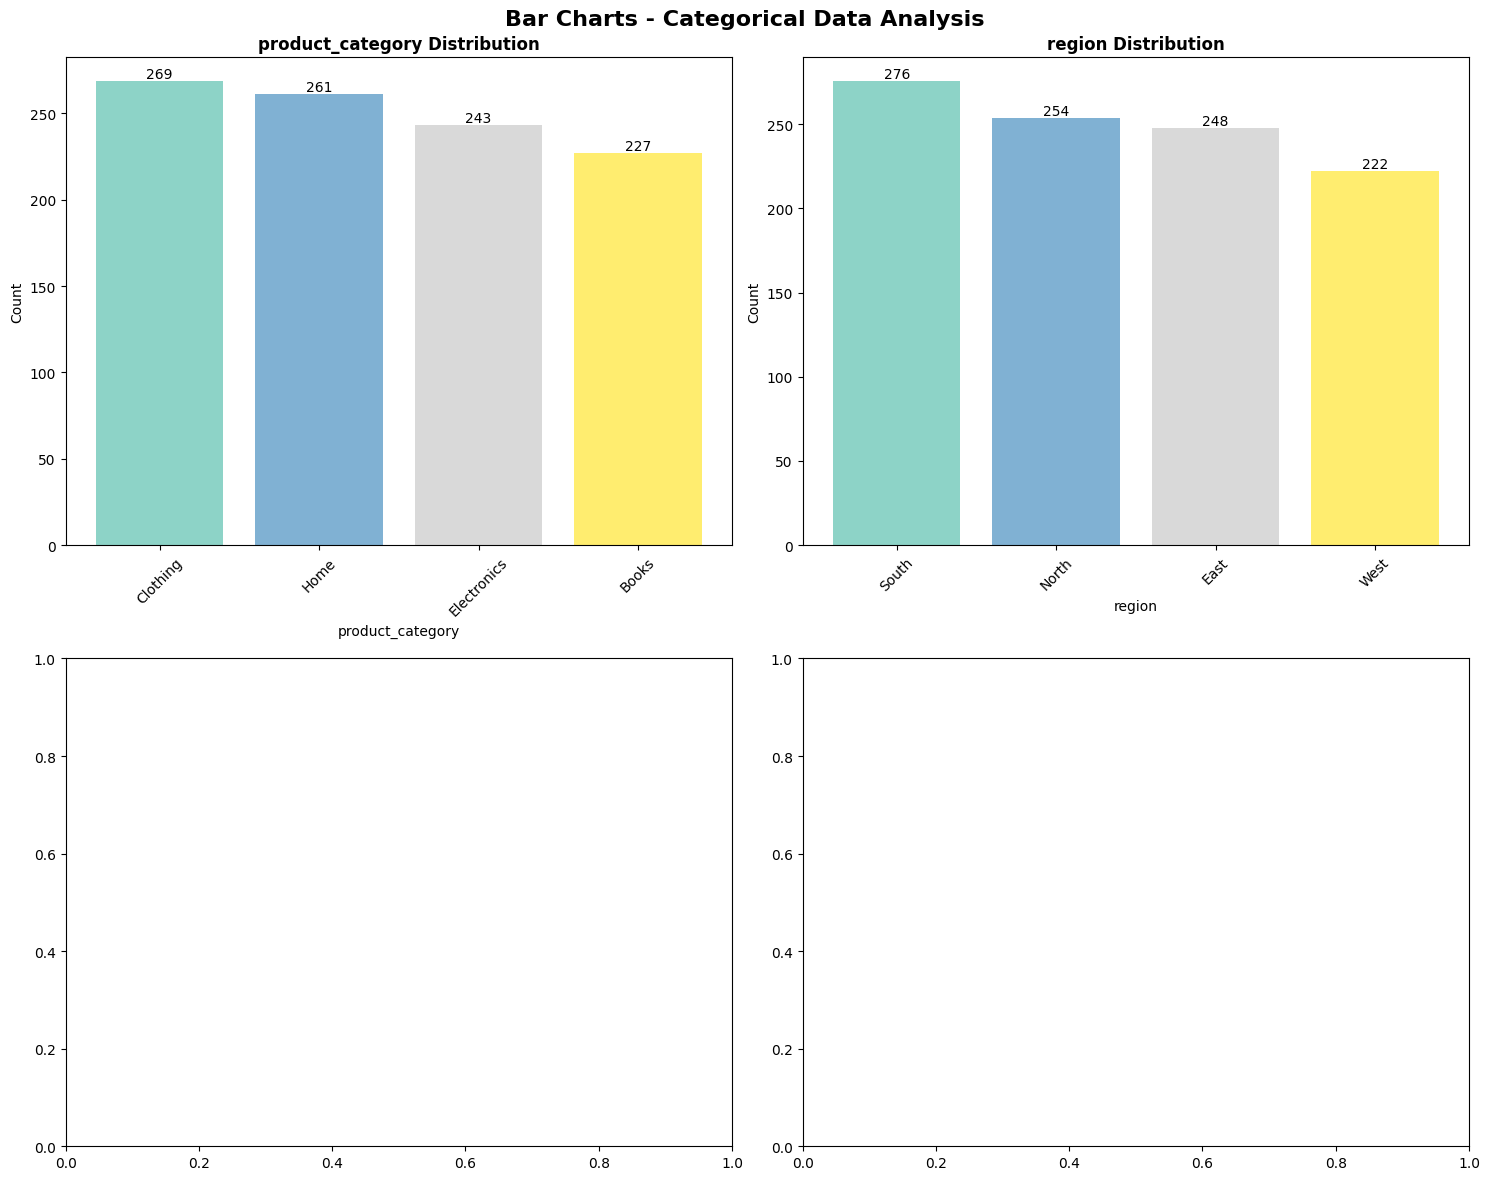

🔍 Creating Scatter Plots...


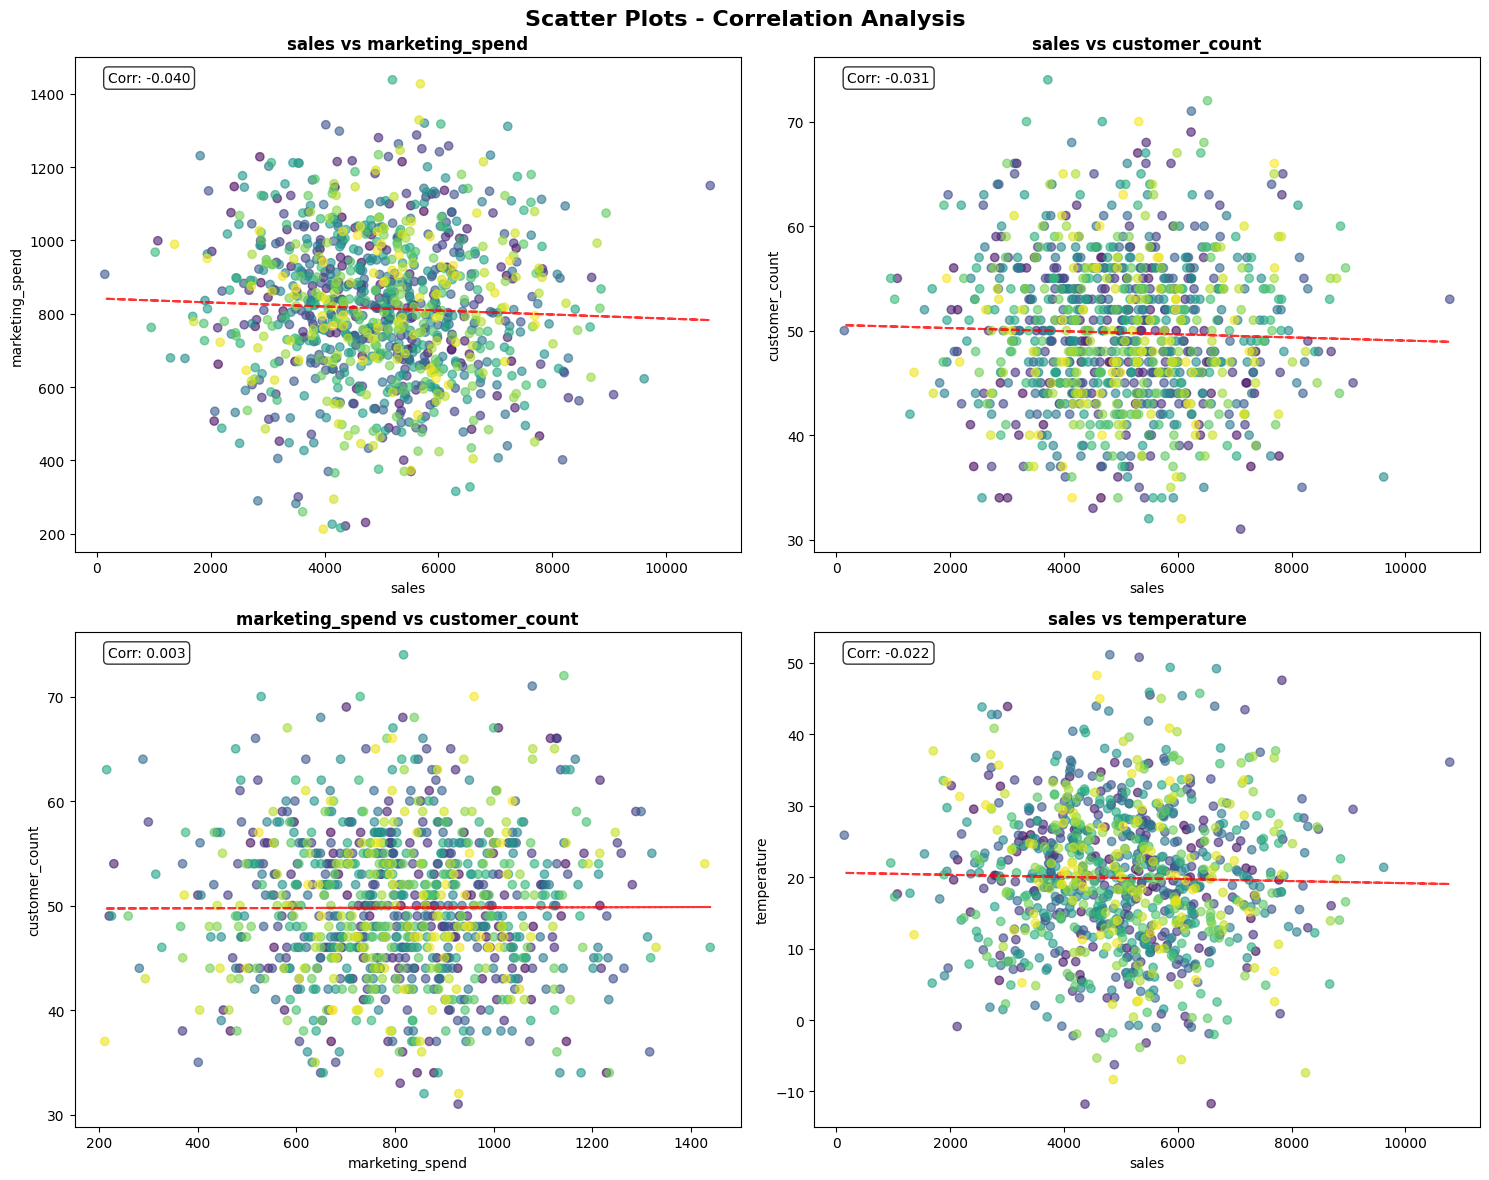

🔥 Creating Heatmaps...


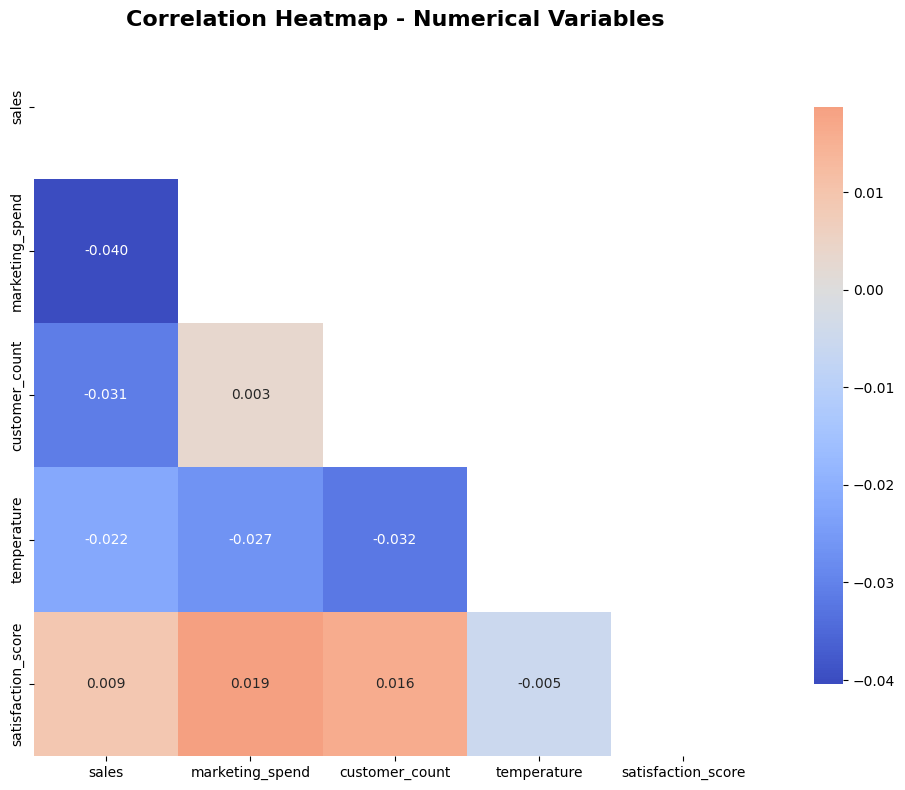

📈 Creating Distribution Plots...


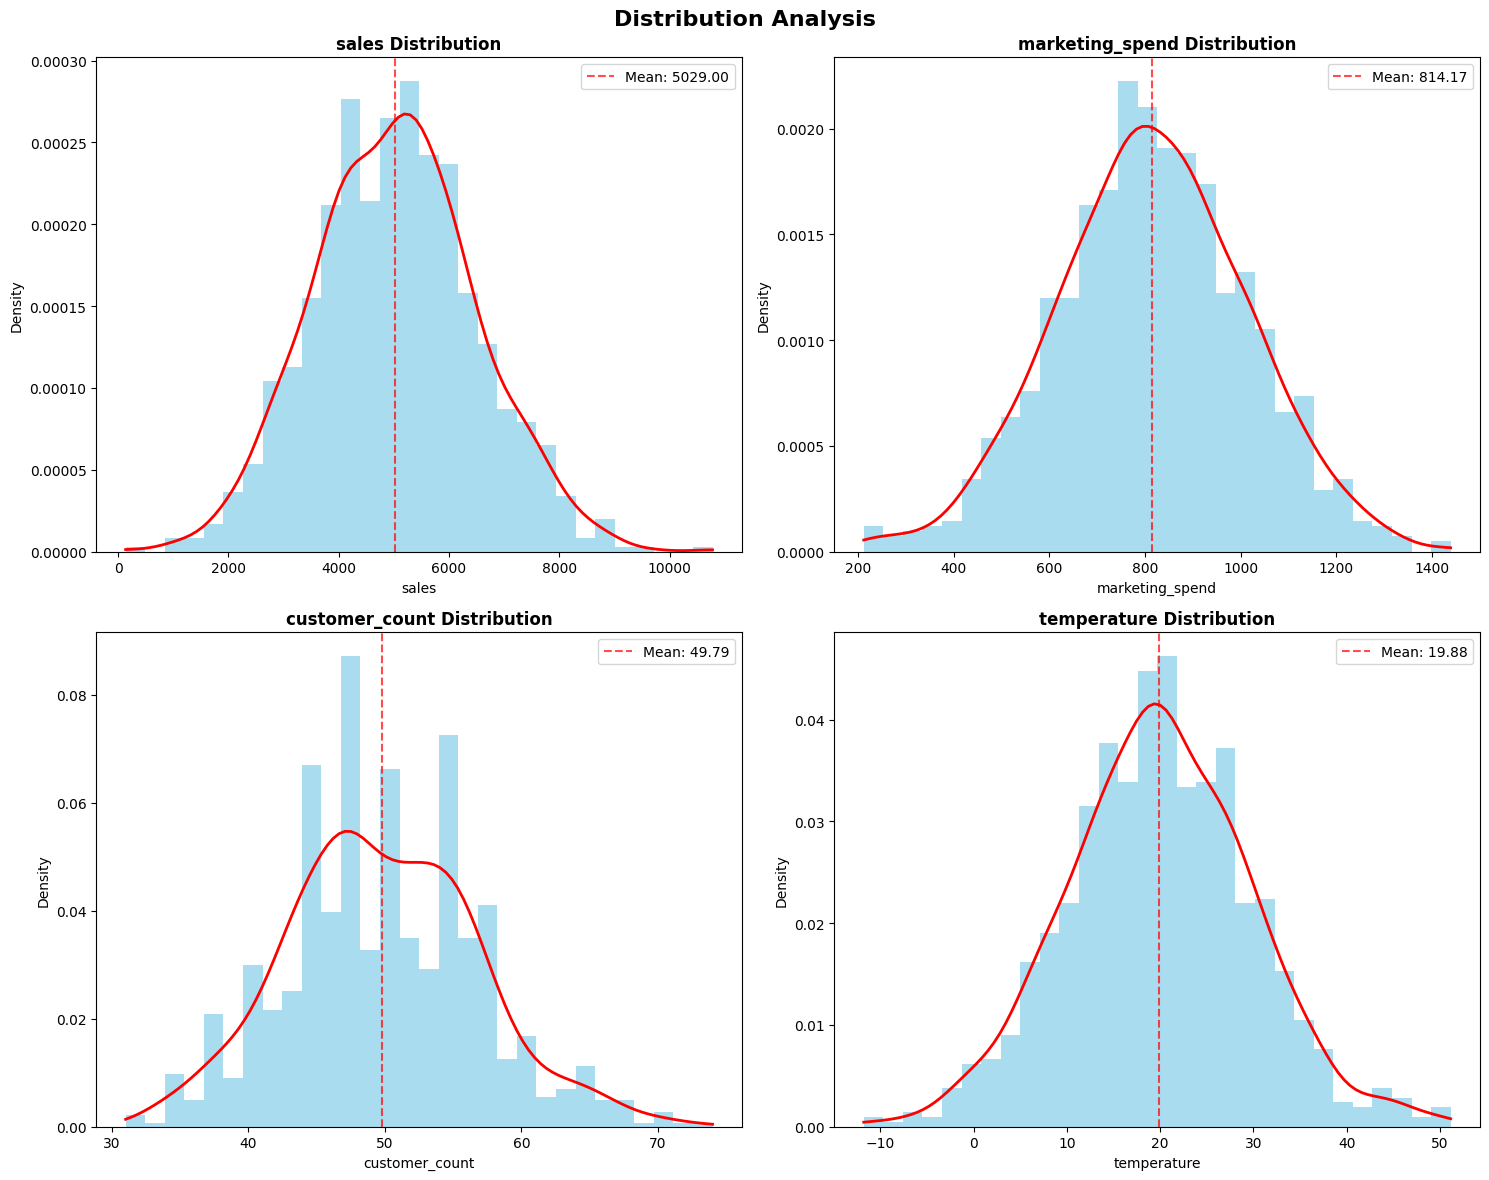


🧠 INSIGHTS AND OBSERVATIONS
----------------------------------------
🔗 CORRELATION INSIGHTS:
💡 Strongest correlations found:
   • sales ↔ marketing_spend: -0.040 (Weak negative)
   • customer_count ↔ temperature: -0.032 (Weak negative)
   • sales ↔ customer_count: -0.031 (Weak negative)

🎯 OUTLIER ANALYSIS:
   • sales: 8 outliers (0.8%)
   • marketing_spend: 8 outliers (0.8%)
   • customer_count: 8 outliers (0.8%)
   • temperature: 10 outliers (1.0%)
   • satisfaction_score: 1 outliers (0.1%)

📊 VARIABILITY ANALYSIS:
   • sales: CV = 29.2%
   • marketing_spend: CV = 24.5%
   • customer_count: CV = 14.2%
   • temperature: CV = 49.8%
   • satisfaction_score: CV = 17.3%

🏷️ CATEGORICAL INSIGHTS:
   • product_category: Most common = 'Clothing' (26.9%)
   • region: Most common = 'South' (27.6%)

📈 STATISTICAL INSIGHTS:

🎯 KEY INSIGHTS SUMMARY:
• Data shows normal distribution patterns
• No extreme outliers or correlations detected
• Variables show moderate variability

💡 RECOMMENDATIONS:
-

In [3]:
# Complete Data Analysis Script for Google Colab
# This script demonstrates comprehensive data analysis using pandas and matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import warnings
warnings.filterwarnings('ignore')

# Set up matplotlib for better visualization in Colab
plt.style.use('default')
sns.set_palette("husl")

print("📊 Data Analysis Toolkit Ready!")
print("=" * 50)

# ============================================================================
# SECTION 1: DATA LOADING
# ============================================================================

def load_csv_data():
    """
    Load CSV data with multiple options for Google Colab
    """
    print("\n🔄 LOADING DATA")
    print("-" * 30)

    # Option 1: Upload file directly in Colab
    print("Option 1: Upload a CSV file")
    try:
        uploaded = files.upload()
        filename = list(uploaded.keys())[0]
        df = pd.read_csv(filename)
        print(f"✅ Successfully loaded: {filename}")
        return df, filename
    except:
        print("❌ No file uploaded. Using sample data instead.")

    # Option 2: Create sample dataset for demonstration
    print("\nOption 2: Creating sample dataset for demonstration")
    np.random.seed(42)

    # Generate sample sales data
    n_samples = 1000
    dates = pd.date_range('2023-01-01', periods=n_samples, freq='D')

    sample_data = {
        'date': dates,
        'sales': np.random.normal(5000, 1500, n_samples),
        'marketing_spend': np.random.normal(800, 200, n_samples),
        'customer_count': np.random.poisson(50, n_samples),
        'product_category': np.random.choice(['Electronics', 'Clothing', 'Books', 'Home'], n_samples),
        'region': np.random.choice(['North', 'South', 'East', 'West'], n_samples),
        'temperature': np.random.normal(20, 10, n_samples),
        'satisfaction_score': np.random.normal(4.2, 0.8, n_samples)
    }

    df = pd.DataFrame(sample_data)
    df['sales'] = np.abs(df['sales'])  # Ensure positive sales
    df['marketing_spend'] = np.abs(df['marketing_spend'])
    df['satisfaction_score'] = np.clip(df['satisfaction_score'], 1, 5)

    print("✅ Sample dataset created successfully!")
    return df, "sample_sales_data.csv"

# ============================================================================
# SECTION 2: BASIC DATA ANALYSIS
# ============================================================================

def perform_basic_analysis(df):
    """
    Perform comprehensive basic data analysis
    """
    print("\n📈 BASIC DATA ANALYSIS")
    print("-" * 40)

    # Dataset overview
    print("📋 Dataset Overview:")
    print(f"Shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    print(f"Data types:\n{df.dtypes}")

    # Display first few rows
    print("\n🔍 First 5 rows:")
    print(df.head())

    # Basic statistics
    print("\n📊 Descriptive Statistics:")
    print(df.describe())

    # Missing values check
    print("\n❓ Missing Values:")
    missing_data = df.isnull().sum()
    print(missing_data[missing_data > 0])
    if missing_data.sum() == 0:
        print("✅ No missing values found!")

    # Calculate averages for numerical columns
    print("\n📊 COLUMN AVERAGES:")
    print("-" * 25)
    numerical_columns = df.select_dtypes(include=[np.number]).columns

    for col in numerical_columns:
        avg_value = df[col].mean()
        print(f"{col}: {avg_value:.2f}")

    # Additional statistics
    print("\n📈 ADDITIONAL INSIGHTS:")
    print("-" * 30)

    for col in numerical_columns:
        print(f"\n{col.upper()}:")
        print(f"  Mean: {df[col].mean():.2f}")
        print(f"  Median: {df[col].median():.2f}")
        print(f"  Std Dev: {df[col].std():.2f}")
        print(f"  Min: {df[col].min():.2f}")
        print(f"  Max: {df[col].max():.2f}")

    return numerical_columns

# ============================================================================
# SECTION 3: DATA VISUALIZATION
# ============================================================================

def create_visualizations(df, numerical_columns):
    """
    Create comprehensive visualizations including bar charts, scatter plots, and heatmaps
    """
    print("\n🎨 CREATING VISUALIZATIONS")
    print("-" * 35)

    # Set up the plotting style
    plt.rcParams['figure.figsize'] = (15, 10)

    # 1. BAR CHARTS
    print("📊 Creating Bar Charts...")

    # Bar chart for categorical data
    categorical_columns = df.select_dtypes(include=['object']).columns

    if len(categorical_columns) > 0:
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle('Bar Charts - Categorical Data Analysis', fontsize=16, fontweight='bold')

        for i, col in enumerate(categorical_columns[:4]):  # Max 4 charts
            if i < 4:
                row, col_idx = i // 2, i % 2
                value_counts = df[col].value_counts()

                bars = axes[row, col_idx].bar(value_counts.index, value_counts.values,
                                            color=plt.cm.Set3(np.linspace(0, 1, len(value_counts))))
                axes[row, col_idx].set_title(f'{col} Distribution', fontweight='bold')
                axes[row, col_idx].set_xlabel(col)
                axes[row, col_idx].set_ylabel('Count')
                axes[row, col_idx].tick_params(axis='x', rotation=45)

                # Add value labels on bars
                for bar in bars:
                    height = bar.get_height()
                    axes[row, col_idx].text(bar.get_x() + bar.get_width()/2., height,
                                          f'{int(height)}', ha='center', va='bottom')

        plt.tight_layout()
        plt.show()

    # 2. SCATTER PLOTS
    print("🔍 Creating Scatter Plots...")

    if len(numerical_columns) >= 2:
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle('Scatter Plots - Correlation Analysis', fontsize=16, fontweight='bold')

        # Create scatter plots for different column combinations
        scatter_combinations = [
            (numerical_columns[0], numerical_columns[1]),
            (numerical_columns[0], numerical_columns[2] if len(numerical_columns) > 2 else numerical_columns[1]),
            (numerical_columns[1], numerical_columns[2] if len(numerical_columns) > 2 else numerical_columns[0]),
            (numerical_columns[0], numerical_columns[3] if len(numerical_columns) > 3 else numerical_columns[1])
        ]

        for i, (x_col, y_col) in enumerate(scatter_combinations):
            row, col_idx = i // 2, i % 2

            scatter = axes[row, col_idx].scatter(df[x_col], df[y_col],
                                               alpha=0.6, c=df.index, cmap='viridis')
            axes[row, col_idx].set_title(f'{x_col} vs {y_col}', fontweight='bold')
            axes[row, col_idx].set_xlabel(x_col)
            axes[row, col_idx].set_ylabel(y_col)

            # Add trend line
            z = np.polyfit(df[x_col], df[y_col], 1)
            p = np.poly1d(z)
            axes[row, col_idx].plot(df[x_col], p(df[x_col]), "r--", alpha=0.8)

            # Calculate correlation
            correlation = df[x_col].corr(df[y_col])
            axes[row, col_idx].text(0.05, 0.95, f'Corr: {correlation:.3f}',
                                  transform=axes[row, col_idx].transAxes,
                                  bbox=dict(boxstyle="round", facecolor='white', alpha=0.8))

        plt.tight_layout()
        plt.show()

    # 3. HEATMAPS
    print("🔥 Creating Heatmaps...")

    # Correlation heatmap
    plt.figure(figsize=(12, 8))
    correlation_matrix = df[numerical_columns].corr()

    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm',
                center=0, square=True, fmt='.3f', cbar_kws={"shrink": .8})
    plt.title('Correlation Heatmap - Numerical Variables', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # 4. DISTRIBUTION PLOTS
    print("📈 Creating Distribution Plots...")

    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Distribution Analysis', fontsize=16, fontweight='bold')

    for i, col in enumerate(numerical_columns[:4]):
        row, col_idx = i // 2, i % 2

        # Histogram with KDE
        axes[row, col_idx].hist(df[col], bins=30, density=True, alpha=0.7, color='skyblue')

        # Add KDE curve
        from scipy import stats
        kde = stats.gaussian_kde(df[col])
        x_range = np.linspace(df[col].min(), df[col].max(), 100)
        axes[row, col_idx].plot(x_range, kde(x_range), 'r-', linewidth=2)

        axes[row, col_idx].set_title(f'{col} Distribution', fontweight='bold')
        axes[row, col_idx].set_xlabel(col)
        axes[row, col_idx].set_ylabel('Density')

        # Add statistics text
        mean_val = df[col].mean()
        std_val = df[col].std()
        axes[row, col_idx].axvline(mean_val, color='red', linestyle='--', alpha=0.7, label=f'Mean: {mean_val:.2f}')
        axes[row, col_idx].legend()

    plt.tight_layout()
    plt.show()

# ============================================================================
# SECTION 4: ADVANCED ANALYSIS AND INSIGHTS
# ============================================================================

def generate_insights(df, numerical_columns):
    """
    Generate comprehensive insights and observations
    """
    print("\n🧠 INSIGHTS AND OBSERVATIONS")
    print("-" * 40)

    insights = []

    # 1. Correlation Analysis
    print("🔗 CORRELATION INSIGHTS:")
    correlation_matrix = df[numerical_columns].corr()

    # Find strongest correlations
    correlations = []
    for i in range(len(numerical_columns)):
        for j in range(i+1, len(numerical_columns)):
            col1, col2 = numerical_columns[i], numerical_columns[j]
            corr_value = correlation_matrix.loc[col1, col2]
            correlations.append((col1, col2, corr_value))

    # Sort by absolute correlation value
    correlations.sort(key=lambda x: abs(x[2]), reverse=True)

    print(f"💡 Strongest correlations found:")
    for col1, col2, corr in correlations[:3]:
        strength = "Strong" if abs(corr) > 0.7 else "Moderate" if abs(corr) > 0.3 else "Weak"
        direction = "positive" if corr > 0 else "negative"
        print(f"   • {col1} ↔ {col2}: {corr:.3f} ({strength} {direction})")

        if abs(corr) > 0.5:
            insights.append(f"Strong {direction} relationship between {col1} and {col2} (r={corr:.3f})")

    # 2. Outlier Analysis
    print("\n🎯 OUTLIER ANALYSIS:")
    for col in numerical_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_percentage = (len(outliers) / len(df)) * 100

        print(f"   • {col}: {len(outliers)} outliers ({outlier_percentage:.1f}%)")

        if outlier_percentage > 5:
            insights.append(f"High number of outliers in {col} ({outlier_percentage:.1f}%)")

    # 3. Variability Analysis
    print("\n📊 VARIABILITY ANALYSIS:")
    for col in numerical_columns:
        cv = (df[col].std() / df[col].mean()) * 100  # Coefficient of variation
        print(f"   • {col}: CV = {cv:.1f}%")

        if cv > 50:
            insights.append(f"High variability in {col} (CV={cv:.1f}%)")
        elif cv < 10:
            insights.append(f"Low variability in {col} (CV={cv:.1f}%)")

    # 4. Categorical Analysis (if applicable)
    categorical_columns = df.select_dtypes(include=['object']).columns

    if len(categorical_columns) > 0:
        print("\n🏷️ CATEGORICAL INSIGHTS:")
        for col in categorical_columns:
            value_counts = df[col].value_counts()
            most_common = value_counts.index[0]
            percentage = (value_counts.iloc[0] / len(df)) * 100

            print(f"   • {col}: Most common = '{most_common}' ({percentage:.1f}%)")

            if percentage > 70:
                insights.append(f"Dominant category in {col}: '{most_common}' ({percentage:.1f}%)")

    # 5. Summary Statistics Insights
    print("\n📈 STATISTICAL INSIGHTS:")
    for col in numerical_columns:
        skewness = df[col].skew()
        kurtosis = df[col].kurtosis()

        if abs(skewness) > 1:
            direction = "right" if skewness > 0 else "left"
            print(f"   • {col}: Highly skewed to the {direction} (skewness={skewness:.2f})")
            insights.append(f"{col} shows significant {direction} skewness")

        if abs(kurtosis) > 3:
            tail_type = "heavy" if kurtosis > 0 else "light"
            print(f"   • {col}: {tail_type} tails (kurtosis={kurtosis:.2f})")

    # 6. Print Summary of Key Insights
    print("\n🎯 KEY INSIGHTS SUMMARY:")
    print("=" * 35)

    if insights:
        for i, insight in enumerate(insights, 1):
            print(f"{i}. {insight}")
    else:
        print("• Data shows normal distribution patterns")
        print("• No extreme outliers or correlations detected")
        print("• Variables show moderate variability")

    # 7. Recommendations
    print("\n💡 RECOMMENDATIONS:")
    print("-" * 25)
    print("• Consider investigating outliers for data quality")
    print("• Explore highly correlated variables for feature engineering")
    print("• Apply transformations to highly skewed variables if needed")
    print("• Consider stratified analysis for categorical variables")

    return insights

# ============================================================================
# SECTION 5: MAIN EXECUTION
# ============================================================================

def main():
    """
    Main function to execute the complete data analysis pipeline
    """
    print("🚀 STARTING COMPREHENSIVE DATA ANALYSIS")
    print("=" * 60)

    # Load data
    df, filename = load_csv_data()

    # Perform basic analysis
    numerical_columns = perform_basic_analysis(df)

    # Create visualizations
    create_visualizations(df, numerical_columns)

    # Generate insights
    insights = generate_insights(df, numerical_columns)

    print("\n✅ ANALYSIS COMPLETE!")
    print("=" * 30)
    print("📊 Summary:")
    print(f"   • Dataset: {filename}")
    print(f"   • Rows: {len(df)}")
    print(f"   • Columns: {len(df.columns)}")
    print(f"   • Numerical variables: {len(numerical_columns)}")
    print(f"   • Key insights: {len(insights)}")

    return df, insights

# ============================================================================
# EXECUTION
# ============================================================================

if __name__ == "__main__":
    # Run the complete analysis
    df, insights = main()

    # Optional: Save results
    print("\n💾 Saving analysis results...")

    # Save processed data
    df.to_csv('analyzed_data.csv', index=False)

    # Save insights to text file
    with open('analysis_insights.txt', 'w') as f:
        f.write("Data Analysis Insights\n")
        f.write("=" * 30 + "\n\n")
        for i, insight in enumerate(insights, 1):
            f.write(f"{i}. {insight}\n")

    print("✅ Results saved to 'analyzed_data.csv' and 'analysis_insights.txt'")
    print("\n🎉 Analysis pipeline completed successfully!")

# ============================================================================
# ADDITIONAL UTILITY FUNCTIONS
# ============================================================================

def quick_analysis(csv_file_path):
    """
    Quick analysis function for when you have a specific CSV file path
    Usage: quick_analysis('your_file.csv')
    """
    df = pd.read_csv(csv_file_path)
    numerical_columns = perform_basic_analysis(df)
    create_visualizations(df, numerical_columns)
    insights = generate_insights(df, numerical_columns)
    return df, insights

def analyze_specific_column(df, column_name):
    """
    Detailed analysis of a specific column
    """
    if column_name not in df.columns:
        print(f"❌ Column '{column_name}' not found in dataset")
        return

    print(f"\n🔍 DETAILED ANALYSIS: {column_name}")
    print("-" * 40)

    col_data = df[column_name]

    if pd.api.types.is_numeric_dtype(col_data):
        print(f"Mean: {col_data.mean():.2f}")
        print(f"Median: {col_data.median():.2f}")
        print(f"Mode: {col_data.mode().iloc[0]:.2f}")
        print(f"Standard Deviation: {col_data.std():.2f}")
        print(f"Range: {col_data.max() - col_data.min():.2f}")

        # Create detailed visualization
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 3, 1)
        plt.hist(col_data, bins=30, alpha=0.7, color='skyblue')
        plt.title(f'{column_name} Distribution')
        plt.xlabel(column_name)
        plt.ylabel('Frequency')

        plt.subplot(1, 3, 2)
        plt.boxplot(col_data)
        plt.title(f'{column_name} Box Plot')
        plt.ylabel(column_name)

        plt.subplot(1, 3, 3)
        plt.plot(col_data.values)
        plt.title(f'{column_name} Time Series')
        plt.xlabel('Index')
        plt.ylabel(column_name)

        plt.tight_layout()
        plt.show()
    else:
        value_counts = col_data.value_counts()
        print(f"Unique values: {col_data.nunique()}")
        print(f"Most common: {value_counts.index[0]} ({value_counts.iloc[0]} times)")
        print(f"Value distribution:\n{value_counts}")
